# Aritificial Neuron Network

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
#from matplotlib.pyplot import plt
%matplotlib inline
print(tf.__version__)

2.15.0


Toy Practice

In [2]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1],]

y_data = [[0],
          [1],
          [1],
          [0],]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(4, 2) (4, 1)


In [3]:
# 1. define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# 2. model build => hypothesis
model = Sequential()
model.add(Dense(2, activation = "sigmoid", input_dim=2)) # neuron=2, input_dim=2
model.add(Dense(1, activation = "sigmoid"))              # output_dim = 1
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 3. train => cons_fn, metric, optimizer
model.compile(optimizer = "SGD",
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_data, y_data, epochs=1000, batch_size=32, verbose=0)

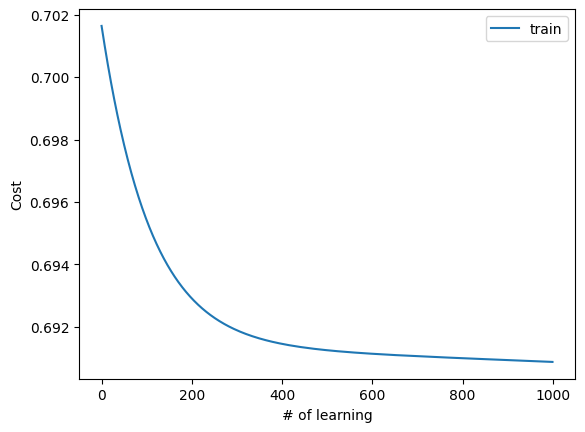

In [8]:
# 4. visualization
pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel("# of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [9]:
# 5. evaluation & predict
loss, train_acc = model.evaluate(x_data, y_data, verbose=0)
print(f"train_acc = {train_acc}")
print(f"loss = {loss}")
predict = model.predict(x_data)
print(predict)

train_acc = 0.5
loss = 0.6908708810806274
1/1 [==============================] - 0s 64ms/step
[[0.49617332]
 [0.47928533]
 [0.5262102 ]
 [0.50363666]]


# MNIST with ANN

In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Train / Test set으로 mnist 데이터 할당
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


In [12]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# x_train = x_train.reshape([-1, 28*28])
# x_test = x_test.reshape([-1, 28*28])
# print(x_train.shape, x_test.shape)

x_train, x_test  = x_train / 255. , x_test / 255.
x_train, x_test = (x_train-np.mean(x_train)), (x_test-np.mean(x_test))

In [13]:
from tensorflow.keras.layers import Flatten

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation = "sigmoid"))
model.add(Dense(10, activation = "sigmoid"))
model.add(Dense(1, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7971 (31.14 KB)
Trainable params: 7971 (31.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer = "SGD",
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
3750/3750 [==============================] - 11s 3ms/step - loss: -2411.5791 - accuracy: 0.1124
Epoch 2/5
3750/3750 [==============================] - 10s 3ms/step - loss: -7331.7837 - accuracy: 0.1124
Epoch 3/5
3750/3750 [==============================] - 10s 3ms/step - loss: -12252.7617 - accuracy: 0.1124
Epoch 4/5
3750/3750 [==============================] - 10s 3ms/step - loss: -17173.7188 - accuracy: 0.1124
Epoch 5/5
3750/3750 [==============================] - 10s 3ms/step - loss: -22094.7363 - accuracy: 0.1124


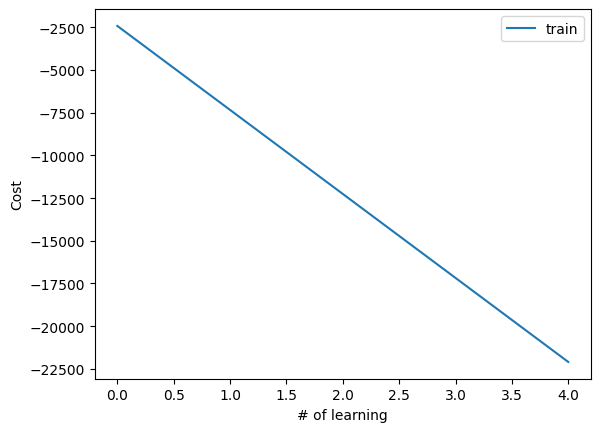

In [16]:
pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel("# of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [17]:
loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"test_acc = {test_acc}")
print(f"loss = {loss}")

test_acc = 0.11349999904632568
loss = -24481.0
